In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.775167555234
Training MSE: 3920868.030
Test MSE: 749921.261


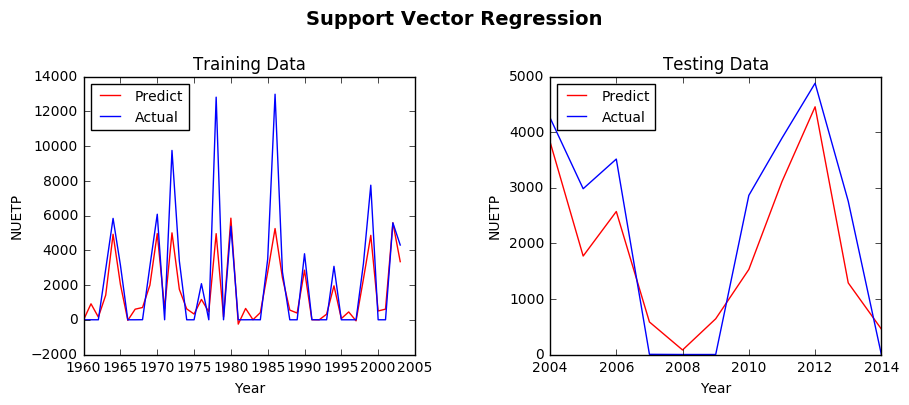

In [10]:
# Read data
data = pd.read_csv("CA.csv")
year1 = data[['Year']][:44]
year2 = data[['Year']][44:55]

# Data Preprocessing
data['GDP_scaled']=preprocessing.scale(data['GDP'])
data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
data['PCP_scaled']=preprocessing.scale(data['PCP'])
data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

# Split data for train and test
all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
all_y = data[['NUETP']][:55]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

# SVR for hydro in CA
clf = SVR(kernel='linear', C=40.0, epsilon=0.3).fit(X_train, y_train)

print(clf.score(X_test, y_test))
#print(clf.coef_)

train_error = mean_squared_error(y_train, clf.predict(X_train))
print('Training MSE: %.3f' % train_error)
test_error = mean_squared_error(y_test, clf.predict(X_test))
print('Test MSE: %.3f' % test_error)

# Plots
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Support Vector Regression', fontsize=14, fontweight='bold')

# Plot for training data
fig.add_subplot(121)
plt.plot(year1, clf.predict(X_train), color='red', label='Predict')
plt.plot(year1, y_train, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('NUETP')

# Plot for test data
fig.add_subplot(122)
plt.plot(year2, clf.predict(X_test), color='red', label='Predict')
plt.plot(year2, y_test, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('NUETP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()

In [11]:
# predict Solar for future
year3 = data[['Year']][-6:]
year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
pred = pd.DataFrame(clf.predict(future_x))
pred.columns = ['NUETP']
future = pd.concat([year3, pred], axis=1)
print(future)

     Year        NUETP
0  2015.0  4774.735493
1  2016.0  5028.771805
2  2017.0  5102.505030
3  2018.0  5209.445571
4  2019.0  5314.606460
5  2020.0  5425.677666


In [15]:
statelist=["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
result = year3

for i in range(49):
    data = pd.read_csv('%s.csv' % (statelist[i]))
    
    year1 = data[['Year']][:44]
    year2 = data[['Year']][44:55]

    # Data Preprocessing
    data['GDP_scaled']=preprocessing.scale(data['GDP'])
    data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
    data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
    data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
    data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
    data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
    data['PCP_scaled']=preprocessing.scale(data['PCP'])
    data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
    data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
    data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

    # Split data for train and test
    all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
    all_y = data[['NUETP']][:55]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

    # SVR for hydro in CA
    clf = SVR(kernel='linear', C=40.0, epsilon=0.3).fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    # predict Hydro for future
    #year3 = data[['Year']][-6:]
    #year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
    future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
    pred = pd.DataFrame(clf.predict(future_x))
    pred.columns = [statelist[i]]
    result = pd.concat([result, pred], axis=1)

print(result)

# output to csv
result.to_csv('NUETP_Pred_SVR.csv', encoding='utf-8', index=False)

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-47.0740319287
1.0
1.0
0.0
0.775167555234
0.845431201151
1.0
0.0
1.0
1.0
0.723868588393
0.103828330971
-18.1278904013
0.0
0.849394676654
1.0
1.0
0.0
0.0
0.0
-2153.62536228
0.798052459281
0.0
1.0
-0.178547822539
1.0
-1.93012301527
0.707555466709
0.0
0.45354216088
0.76919062181
0.0


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


0.603706252299
0.854410420641
0.589071335938
0.736721807969
0.508670443376
0.0
1.0
-1.32165563776
0.553682686949
0.523057795275
0.0
1.0
0.51898076912
-0.648475925077
-0.802040087315
-4.16819769778
0.908904768414
     Year        AK   AL   AR          AZ           CA           CO   CT  \
0  2015.0  5.015171  0.0  0.0  478.045899  4774.735493  2537.905063  0.0   
1  2016.0  6.012591  0.0  0.0  556.350916  5028.771805  2903.385420  0.0   
2  2017.0  7.025468  0.0  0.0  645.588717  5102.505030  3240.850571  0.0   
3  2018.0  7.929317  0.0  0.0  747.305306  5209.445571  3643.572515  0.0   
4  2019.0  8.522937  0.0  0.0  863.050703  5314.606460  4039.571302  0.0   
5  2020.0  9.195280  0.0  0.0  995.020553  5425.677666  4509.730919  0.0   

         DE   FL     ...                SD         TN           TX  \
0  0.831936  0.0     ...        905.924295  22.132225  5801.834588   
1  1.070581  0.0     ...       1089.130403  27.784452  6127.590096   
2  1.340477  0.0     ...       1282.511713  3